In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

base_url = "https://openapi.gg.go.kr/ChildProtectionArea?KEY=737c37d3f5784ef881b0f7e272c66018&Type=xml&pSize=733&pIndex="
SchoolZone_info = {}
page_num = 1

sig_cd_list=[]
loc_list = []
addr_list = []
cctv_yn_list = []
cctv_cnt_list = []
road_bt_list = []
lat_list = []
logt_list = []

while page_num<=4:
    url = base_url + str(page_num)
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html,'html.parser')
    
    sig_cd = soup.find_all('sigun_cd')
    loc = soup.find_all('target_faclt_nm')
    addr = soup.find_all('refine_lotno_addr')
    cctv_yn = soup.find_all('cctv_instl_yn')
    cctv_cnt = soup.find_all('cctv_instl_cnt')
    road_bt = soup.find_all('prtcarea_road_bt_info')
    lat = soup.find_all('refine_wgs84_lat')
    logt = soup.find_all('refine_wgs84_logt')
                       
    for code in sig_cd:
        sig_cd_list.append(code.text)
    for code in loc:
        loc_list.append(code.text)
    for code in addr :
        addr_list.append(code.text)
    for code in cctv_yn:
        cctv_yn_list.append(code.text)
    for code in cctv_cnt:
        cctv_cnt_list.append(code.text)
    for code in road_bt:
        road_bt_list.append(code.text)
    for code in lat:
        lat_list.append(code.text)
    for code in logt:
        logt_list.append(code.text)
    page_num+=1
    
SchoolZone_info['SIG_CD'] = sig_cd_list
SchoolZone_info['LOC'] = loc_list
SchoolZone_info['ADDR'] = addr_list
SchoolZone_info['CCTV_YN'] = cctv_yn_list
SchoolZone_info['CCTV_CNT'] = cctv_cnt_list
SchoolZone_info['ROAD_BT'] = road_bt_list
SchoolZone_info['LATITUDE'] = lat_list
SchoolZone_info['LONGITUDE'] = logt_list

df = pd.DataFrame(SchoolZone_info)
df = df[['SIG_CD','LOC','ADDR','CCTV_YN','CCTV_CNT','ROAD_BT','LATITUDE','LONGITUDE']]

df.to_csv("./SchoolZone_info.csv",encoding='ms949')

In [8]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

base_url = "https://openapi.gg.go.kr/Tbtninsttm?KEY=17b2454bd4094e84a1a3e076eacfbc95&Type=xml&pSize=7&pIndex="
SchoolZoneAcc_info = {}
n_pages = 1

loc_list = []
occurs_list = []
casualties_list = []
dead_list = []
latitude_list = []
longitude_list = []

while n_pages<=13:
    url = base_url + str(n_pages)
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html,'html.parser')
    
    loc = soup.find_all('loc_info')
    occurs = soup.find_all('occur_cnt')
    casualties = soup.find_all('caslt_cnt')
    dead = soup.find_all('dprs_cnt')
    latitude = soup.find_all('lat')
    longitude = soup.find_all('logt')
                       
    for code in loc:
        loc_list.append(code.text)
    for code in occurs:
        occurs_list.append(code.text)
    for code in casualties:
        casualties_list.append(code.text)
    for code in dead:
        dead_list.append(code.text)
    for code in latitude:
        latitude_list.append(code.text)
    for code in longitude:
        longitude_list.append(code.text)
    
    n_pages = n_pages+1
    
    
SchoolZoneAcc_info['LOC'] = loc_list
SchoolZoneAcc_info['OCCUR'] = occurs_list
SchoolZoneAcc_info['CASLT'] = casualties_list
SchoolZoneAcc_info['DPRS'] = dead_list
SchoolZoneAcc_info['LATITUDE'] = latitude_list
SchoolZoneAcc_info['LONGITUDE'] = longitude_list

df = pd.DataFrame(SchoolZoneAcc_info)
df = df[['LOC','OCCUR','CASLT','DPRS','LATITUDE','LONGITUDE']]

df.to_csv("./SchoolZoneAcc_info.csv",encoding = 'ms949')

In [9]:
import folium
from folium.plugins import MarkerCluster, MiniMap
import pandas as pd

data = pd.read_csv("./SchoolZone_info.csv",encoding="euc-kr")

map_hs = folium.Map((37.470493, 127.057265), zoom_start = 10)
mc = MarkerCluster() 

Locals = list(data['LOC'])
cctv_yns = list(data['CCTV_YN'])
cctv_cnts = list(data['CCTV_CNT'])
road_bts = list(data['ROAD_BT'])
latitudes = list(data['LATITUDE'])
longitudes = list(data['LONGITUDE'])

colors = ['green','yellow','red']

for i in range(len(Locals)):
    
    if cctv_cnts[i] >5:
        color_class = 0
    elif cctv_cnts[i] >3:
        color_class = 1
    else :
        color_class = 2
        
    color_1 = colors[color_class]
    mc.add_child(folium.CircleMarker(location = [latitudes[i], longitudes[i]],
                               radius = cctv_cnts[i]*5,
                               popup=[Locals[i]],
                                color = color_1,
                                     
                                fill = True))
                                
    map_hs.add_child(mc)

map_hs

In [4]:
import folium
from folium.plugins import MarkerCluster, MiniMap

data = pd.read_csv("./SchoolZoneAcc_info.csv",encoding="euc-kr")



map_hs = folium.Map((37.470493, 127.057265), zoom_start = 10)
mc = MarkerCluster() 


Loc = list(data['LOC'])
Occurs = list(data['OCCUR']) 
Casualties = list(data['CASLT'])
Dead = list(data['DPRS'])
Latitude = list(data['LATITUDE'])
Longitude = list(data['LONGITUDE'])

color = ['red','yellow','green']

for i in range(len(Loc)):
    
    if Casualties[i]>= 4 or Dead[i]>=1:
        color_class = 0
    elif Casualties[i]>=2 :
        color_class = 1
    else :
        color_class = 2
    color_1 = color[color_class]
        
    mc.add_child(folium.CircleMarker(location = [Latitude[i], Longitude[i]],
                                     radius = Casualties[i]*7,
                                     popup=[Loc[i]],
                                     color = color_1,
                                     fill = True
                                    ))
    
    
    map_hs.add_child(mc)

map_hs

In [5]:
import folium
import pandas as pd
import json


CCTV_status = pd.read_csv("./SchoolZone_cctv_cnt.csv")


state_geo = 'TL_SCCO_SIG.json'
geo_str = json.load(open(state_geo, encoding='utf-8'))
   

map = folium.Map(location=(37.470493, 127.057265),zoom_start=10)
map.choropleth(geo_data = geo_str , data = CCTV_status,
              columns=['Code','cctv_cnt/area'],
              key_on = 'feature.properties.SIG_CD',
               fill_color='YlGnBu',
              legend_name = 'CCTV_cnt per Area')


folium.LayerControl().add_to(map)

map

E:\Anaconda\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


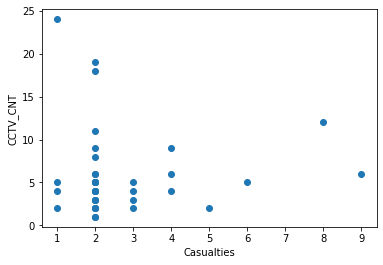

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SchoolZoneFinal.csv",encoding = "euc-kr")
plt.scatter(df['CASLT'],df['CCTV_CNT'])
plt.xlabel('Casualties')
plt.ylabel('CCTV_CNT')
plt.show()

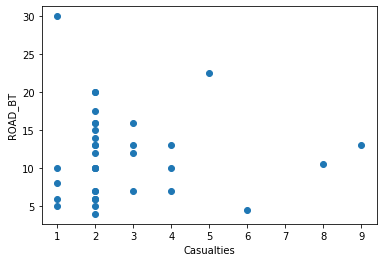

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SchoolZoneFinal.csv",encoding = "euc-kr")
plt.scatter(df['CASLT'],df['ROAD_BT'])
plt.xlabel('Casualties')
plt.ylabel('ROAD_BT')
plt.show()